In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/80209877/Desktop/Demand Forecasting/train.csv')
test=pd.read_csv('C:/Users/80209877/Desktop/Demand Forecasting//test_QoiMO9B.csv')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [4]:
fulfilment_center_info=pd.read_csv('C:/Users/80209877/Desktop/Demand Forecasting/fulfilment_center_info.csv')
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_center_id=pd.merge(df,fulfilment_center_info,on='center_id')
test_center_id=pd.merge(test,fulfilment_center_info,on='center_id')
test_center_id.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [6]:
meal_info=pd.read_csv('C:/Users/80209877/Desktop/Demand Forecasting/meal_info.csv')
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df_final=pd.merge(df_center_id,meal_info,on='meal_id')
test_final=pd.merge(test_center_id,meal_info,on='meal_id')
df_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [8]:
columns_to_drop=['center_id','meal_id']
df_final.drop(labels=columns_to_drop,axis=1,inplace=True)
test_final.drop(labels=columns_to_drop,axis=1,inplace=True)
df_final.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [9]:
df_final.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [10]:
df_final_dummies=pd.get_dummies(df_final)
test_final_dummies=pd.get_dummies(test_final)
test_final_dummies.T.head(31)

,0,1,2,3,4,5,6,7,8,9,...,32563,32564,32565,32566,32567,32568,32569,32570,32571,32572
id,1028232.00,1262649.00,1453211.00,1262599.00,1495848.00,1342607.00,1358429.00,1475006.00,1009709.00,1460444.00,...,1460911.00,1436368.00,1006634.00,1226340.00,1402413.00,1412025.00,1287019.00,1396176.00,1331977.00,1017414.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,150.00,151.00,152.00,153.00,155.00,146.00,147.00,149.00,150.00,152.00
checkout_price,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,158.11,...,581.03,582.03,581.03,581.03,680.03,583.03,582.03,629.53,629.53,630.53
base_price,159.11,159.11,158.14,157.14,159.11,160.11,158.11,158.11,159.11,160.11,...,582.03,582.03,581.03,581.03,678.03,581.03,582.03,629.53,629.53,631.53
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
city_code,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,614.00,...,638.00,638.00,638.00,638.00,638.00,473.00,473.00,473.00,473.00,473.00
region_code,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,85.00,...,56.00,56.00,56.00,56.00,56.00,77.00,77.00,77.00,77.00,77.00
op_area,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.60,...,7.00,7.00,7.00,7.00,7.00,4.50,4.50,4.50,4.50,4.50
center_type_TYPE_A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
y=df_final_dummies['num_orders']
X=df_final_dummies.drop(['num_orders'],axis=1)
X_test=test_final_dummies
display(X.head())
X_test.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,133.92,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,134.86,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,147.50,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1


,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,158.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,159.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,157.14,158.14,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,159.14,157.14,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,160.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1


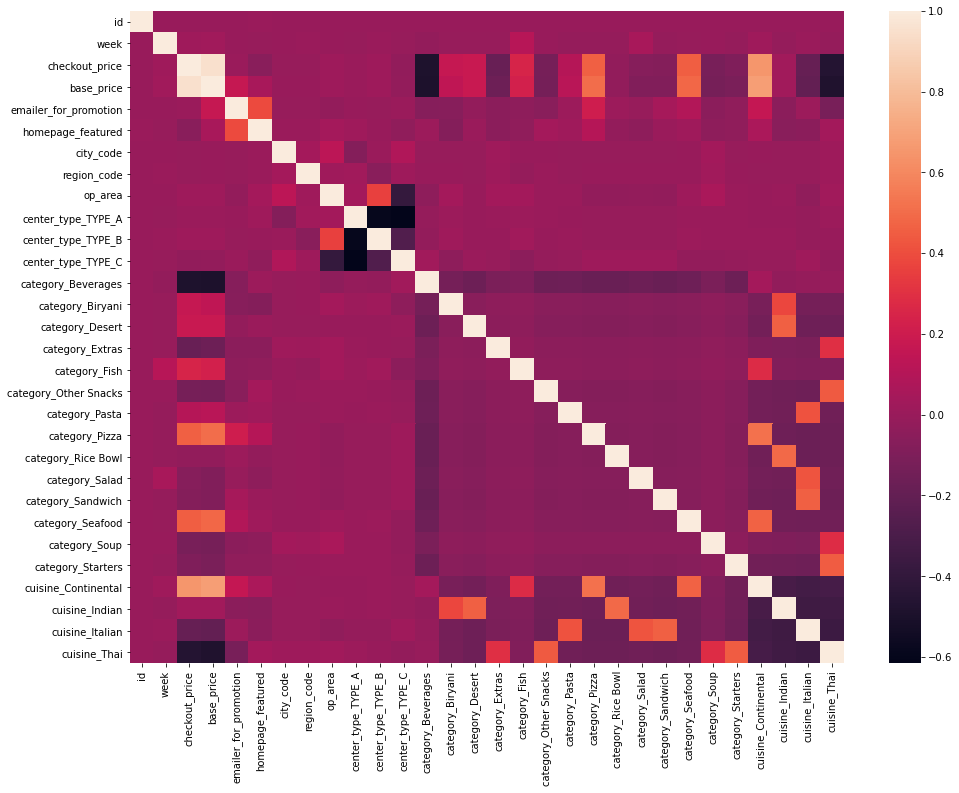

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr())

In [13]:
Pred_id=X_test.id
columns_to_drop=['base_price','id']
X.drop(['base_price'],axis=1,inplace=True)
X_test.drop(['base_price'],axis=1,inplace=True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor(n_estimators=30)
xgb1.fit(X.values,np.array(y))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [16]:
mm.fit(X.values,np.array(y))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
y_preds=mm.predict(X_test.values)
np.sum(y_preds<0)

0

In [18]:
submission=pd.read_csv("C:/Users/80209877/Desktop/Demand Forecasting/sample_submission.csv")
submission.head()
submission['id']=Pred_id
submission['num_orders']=y_preds
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('C:/Users/80209877/Desktop/Demand Forecasting/Random_Forest.csv',index=False)